# A Model to Predict Housing Prices

**Huong Bui**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2-the-data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)

##  Abstract <a class="anchor" id="Abstract"></a>

In this project, our goal was to develop an accurate house price prediction model through a structured approach. After delving into data exploration and evaluating the distribution of the target variable, we examine variable correlations with a keen eye on variables exhibiting substantial links to the target. We rectified missing values through data cleaning and selected the features. Leveraging scikit-learn, we trained linear regression models, evaluating their accuracy using R-squared and scatter plots. Additionally, we conducted a comparative analysis of models with diverse feature sets, discovering their influence on accuracy, and fine-tuning both variables and model performance.

[Back to top](#Index)


## 1. Introduction <a class=“anchor” id=“1.-Introduction”></a>

The process of building our house price prediction model involves several steps. We initiated by understanding the dataset, exploring variable types, and gauging the distribution of the target variable 'SalePrice'. The subsequent steps encompassed investigating correlations between various independent variables and the target.

We then executed data cleaning, effectively handling missing values and ensuring data integrity. Feature selection is a crucial step, where we identified influential variables that would contribute significantly to our model's predictive power. Utilizing the scikit-learn library, we implemented and trained linear regression models, aiming to capture underlying relationships between independent and dependent variables.

Evaluation of model performance entailed metrics like the R-squared value and visualizations like scatter plots to gauge the accuracy of our predictions. We took it a step further by exploring how different subsets of independent variables influenced model outcomes. This process allowed us to compare and fine-tune our model.

Our project journey signifies a blend of data preprocessing, exploratory analysis, model creation, evaluation, and refinement. This comprehensive approach aimed to create a prediction model that accurately forecasts house prices based on insights derived from the data's intricate patterns.

[Back to top](#Index)

## 2. The Data <a class=“anchor” id=“2.-The-Data”></a>

[Back to top](#Index)

### 2.1 Import the Data <a class=“anchor” id=“2.1-Import-the-Data”></a>


Given that the dataset is stored within a CSV file, our initial step involves importing it through a pandas DataFrame. Subsequently, we will start exploring data to gain initial insights into its structure, including row and column quantities, alongside an examination of variable data types.

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Read the CSV file 'houseSmallData.csv' and store the data in the 'data' DataFrame
data = pd.read_csv('houseSmallData.csv')

# Display the shape of the 'data' DataFrame, indicating the number of rows and columns
data.shape

# Create a new DataFrame 'train' by selecting all 100 rows of the 'data' DataFrame
train = data.iloc[0:100, :]

# Display the first few rows of the 'train' DataFrame to inspect the data
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The "data" DataFrame consists of 100 rows and a total of 82 columns. To simplify analysis, we created a new DataFrame called "train" by selecting all 100 rows from the "data" DataFrame (the number of rows can be modified using the iloc method, based on the preferred data amount, but for now, we will use all 100 rows). These columns hold various data types, such as numbers, text, and some instances of NaN values, which will be examined more closely in subsequent steps.

[Back to top](#Index)

### 2.2 Data Exploration <a class=“anchor” id=“2.2-Data-Exploration”></a>

Many machine learning algorithms, including linear regression, assume that the target variable ('SalePrice' in this case) follows a normal distribution. Deviations from this assumption might affect the model's performance and accuracy. Therefore, when exploring the data, we should examine the distribution of the target variable 'SalePrice', as it reveals whether house prices are normally distributed or skewed. Skewed distributions could indicate outliers or specific patterns that require attention, and outliers can impact the model's predictions and overall performance. If the distribution is skewed, we might consider applying transformations to make it more closely resemble a normal distribution.

To understand the central tendencies, variability, and potential presence of outliers in the data, we can use the describe() function. This function is especially useful for obtaining a quick overview of the variable's distribution and identifying any potential issues that need further investigation or preprocessing.

In [2]:
# Extract the 'SalePrice' column from the 'train' DataFrame and store it in the 'salePrice' Series
salePrice = train['SalePrice']

# Display descriptive statistics of the 'salePrice' Series using the describe() function
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

We can see the average house price in this dataset is approximately $173,820, with a minimum of $40,000 and a maximum of $438,780. It has the median price at $153,750. The interquartile range spans from $129,362.50 to $207,750, indicating price variability.

Next, we can create a plot to visually display the distribution and gain insight into its overall shape.

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

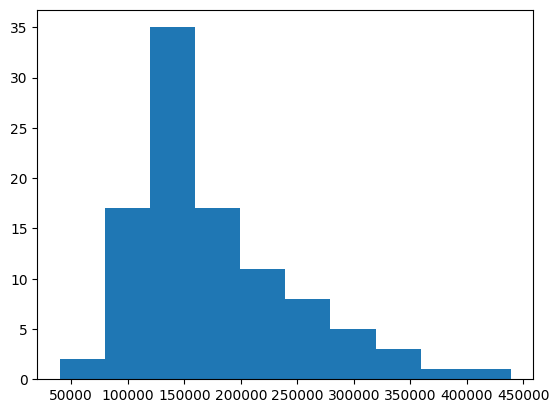

In [4]:
# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of the 'salePrice' Series
plt.hist(salePrice)

The plotted histogram above shows the distribution of 'SalePrice', revealing a right-skewed pattern that currently deviates from a normal distribution. This skewness can also be checked with skew() function. This is where data transformation becomes pertinent, a common practice is to employ a logarithmic transformation on the target variable to assess its alignment with a normal distribution.

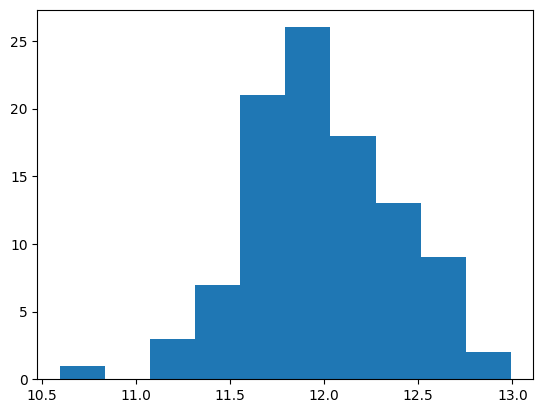

In [5]:
# Import the numpy library for data manipulation
import numpy as np

# Create a histogram to visualize the distribution of the natural logarithm of 'salePrice'
plt.hist(np.log(salePrice))

# Calculate the skewness of the natural logarithm of 'salePrice'
np.log(salePrice).skew()

# Calculate the natural logarithm of 'salePrice' and store it in the 'target' variable
target = np.log(salePrice)

As exhibited in the above histogram, the log transformation yields a closer resemblance to a normal distribution, thereby leading us to adopt this transformed variable as the new target.

Next, we'll investigate the connections between each variable in the DataFrame and the target variable. This will involve creating scatter plots to visually represent relationships between pairs of variables. Initially, we'll concentrate on a subset of variables that are expected to be strongly correlated with the target. Alongside the variables already chosen by Dr. William ('OverallQual', 'MasVnrArea', 'GrLivArea', 'GarageArea'), the upcoming plots will showcase the degree of correlation for 'TotalBsmtSF', 'GarageCars' and 'YearBuilt'.

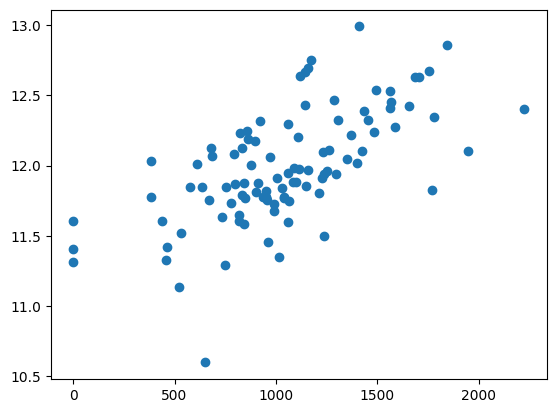

In [6]:
# Create a scatter plot to visualize the relationship between 'TotalBsmtSF' and the target variable 'target'
plt.scatter(train['TotalBsmtSF'], y=target)

The initial scatter plot reveals a correlation between TotalBsmtSF (Total square feet of basement area) and the target variable. When the living area's square footage increases, the target variable also experiences an increase.

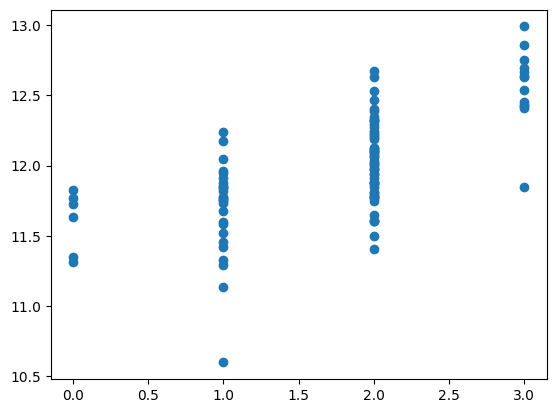

In [7]:
# Create a scatter plot to visualize the relationship between 'GarageCars' and the target variable 'target'
plt.scatter(train['GarageCars'], y=target)

The following scatter plot demonstrates a modest correlation between 'GarageCars' (Size of garage in car capacity) and the target variable. As the car capacity of the garage grows, there's a tendency for the target variable to also increase.

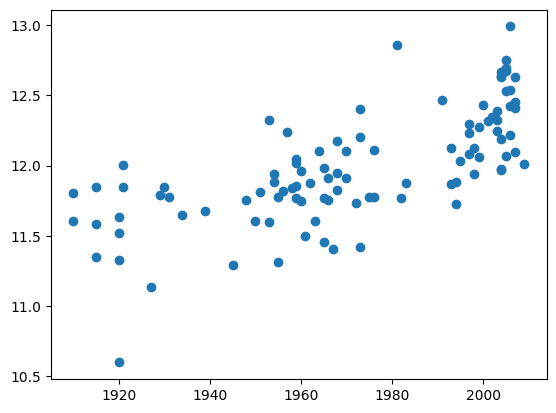

In [8]:
# Create a scatter plot to visualize the relationship between 'YearBuilt' and the target variable 'target'
plt.scatter(train['YearBuilt'], y=target)

The subsequent scatter plot further highlights a strong correlation between 'YearBuilt' (Original construction date) and the target variable. As the construction date becomes more recent (with increasing years), there's a noticeable tendency for the target variable to also increase.

[Back to top](#Index)

### 2.3 Data Preparation <a class=“anchor” id=“2.3-Data-Preparation”></a>

To ensure precise calculations and reliable results, data cleanliness is essential. For this project, we follow these steps in the code cell to clean our data:

In [9]:
# Create a DataFrame 'nulls' to store the count of missing values for each column in the 'train' DataFrame
# Sort the columns in descending order of missing values and display the top 20
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))[0:20]

# Display the 'nulls' DataFrame to inspect the columns with the highest count of missing values
nulls

# Create a DataFrame 'data' containing only numeric columns from the 'train' DataFrame
# Interpolate missing values and drop columns with remaining missing values
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)

# Calculate the sum of columns with non-zero missing values in the 'data' DataFrame
sum(data.isnull().sum()!=0)

# Display the shape of the 'data' DataFrame to show the number of rows and columns after cleaning
data.shape

(100, 39)

[Back to top](#Index)

### 2.4 Correlation <a class=“anchor” id=“2.4-Correlation”></a>

Until now, we know that the correlation between a feature variable and a target variable indicates the degree and direction of their relationship within a dataset. The absolute value of the correlation coefficient indicates the strength of the relationship. A value closer to 1 (either positive or negative) signifies a stronger correlation, while a value closer to 0 indicates a weaker correlation. In the following steps, we'll calculate correlation coefficient between each variable and the target variable, then determine which variables are the most potential predictor to be used in the model. 

In [11]:
# Select only the numeric columns from the 'data' DataFrame
numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix among numeric variables
corr = numeric.corr()

# Select the top 7 variables with the highest correlation to 'SalePrice'
# Sort the variables in descending order of correlation values
cols1 = corr['SalePrice'].sort_values(ascending=False)[0:7].index

# Display the selected variables which are potential predictors of 'SalePrice'
cols1

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF'],
      dtype='object')

Based on the descending sort order, we'll initially select the 6 independent variables from the list (excluding the first one which is the target variable) where the correlation coefficient surpasses 0.6. We'll call this Set 1:
1. OverallQual (Rates the overall material and finish of the house, from 1 as 'Very Poor' to 10 as 'Very Excellent)
2. GrLivArea (Above grade (ground) living area square feet)
3. GarageArea (Size of garage in square feet)
4. GarageCars (Size of garage in car capacity)
5. YearBuilt (Original construction date)
6. TotalBsmtSF (Total square feet of basement area)


[Back to top](#Index)

## 3. Project Description <a class=“anchor” id=“3.-Project-Description”></a>

Our analysis offers an enhancements compared to Dr. Williams' approach. Primarily, we incorporated a broader selection of features exhibiting correlation coefficients surpassing either 0.6 (and later on 0.5 and 0.4). This augmentation in variables enabled us to capture finer-grained patterns and relationships in the dataset. As the result, our model demonstrated better performance, exhibiting higher R-squared values with both the training and test data. This signifies enhanced accuracy in our goal of predicting house prices.

However, it's important to note that including more independent variables does not always guarantee better model performance. There's a trade-off between model complexity and overfitting. Adding too many variables can lead to overfitting, where the model fits the training data perfectly but performs poorly on new, unseen data. Moreover, models with a large number of features require more computational resources for training and prediction. This can lead to longer training times and increased memory usage. Therefore, it's crucial to strike a balance between including relevant variables that enhance the model's explanatory power and avoiding excessive complexity that may lead to overfitting.

[Back to top](#Index)

### 3.1 Linear Regression <a class=“anchor” id=“3.1-Linear-Regression”></a>

The algorithm employed in this project is Linear Regression, a foundational technique in machine learning for modeling relationships between variables. It's designed to predict continuous target variables by establishing a linear connection with one or more independent features. Let's explore its components:

Theory and Origin:
The concept of Linear Regression dates back to the 18th century, with Carl Friedrich Gauss introducing the method of least squares. The goal is to minimize the sum of squared differences between observed data and predicted values. This is achieved by fitting a straight line to the data, characterized by a slope and intercept.

Implementation Steps using Python:

1. Data Loading: Import the dataset and segregate feature variables 
2. Model Initialization: Create an instance of the Linear Regression model using the scikit-learn library's LinearRegression().
3. Model Training: Train the model with the training data using the fit(X, Y) method.
4. Prediction: Utilize the trained model to make predictions of the target variable through the predict(X) function.
5. Evaluation: Gauge the model's effectiveness by using metrics like R-squared, Mean Absolute Error (MAE), or Root Mean Squared Error (RMSE). For this project, we will solely use R-squared.
6. Visualization: Visualize the model's predictions in comparison to the actual data points through scatter plots.

Implementing it in Python, particularly with scikit-learn, is accessible and insightful, contributing to effective data analysis and informed decision-making.

To prepare and structure the data for the linear regression modeling, here are the steps that we take:

1. Select specific columns from the original dataset to create a subset of features (X) that we believe are influential in predicting the target variable.
2. Isolate the target variable, 'SalePrice', into its own Series (Y). 
3. Remove the 'SalePrice' column from the feature variables (X) since it will be used as the target variable. Our goal is to build a model that predicts 'SalePrice' based on other features, so we want to ensure the model doesn't inadvertently use the target variable as a predictor.

In [52]:
# Create a new DataFrame 'X' containing the columns specified in 'cols1'
X = data[cols1]

# Extract the 'SalePrice' column as the target variable 'Y'
Y = X['SalePrice']

# Drop the 'SalePrice' column from the 'X' DataFrame to form the feature variables
X = X.drop(['SalePrice'], axis=1)

# Display the modified 'X' DataFrame containing the selected feature variables
X


,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF
0,7,1710,548,2,2003,856
1,6,1262,460,2,1976,1262
2,7,1786,608,2,2001,920
3,7,1717,642,3,1915,756
4,8,2198,836,3,2000,1145
...,...,...,...,...,...,...
95,6,1470,420,2,1993,680
96,7,1588,472,2,1999,1588
97,4,960,432,1,1965,960
98,5,835,366,1,1920,458


Next step is to import sklearn statement the module linear_model from scikit-learn, which includes linear regression functionalities.

1. Instantiate Linear Regression Model:
lr = linear_model.LinearRegression() creates an instance of the linear regression model. lr is now an object that represents a linear regression model.

2. Fit Model to Data:
model = lr.fit(X, Y) fits the linear regression model to the training data. X represents the feature variables, and Y is the target variable. After this step, the model object has learned from the provided data and is ready to make predictions.

3. Make Predictions:
predictions = model.predict(X) predicts the target variable (Y) using the feature variables (X). The predicted values are stored in the predictions variable.

4. Calculate and Print R-squared:
model.score(X, Y) calculates the R-squared value, which quantifies the goodness of fit of the model. It measures the proportion of variance in the target variable explained by the model.

In [68]:
# Import the scikit-learn library, a machine learning toolkit
import sklearn

# Import the linear_model module from scikit-learn
from sklearn import linear_model

# Create an instance of the LinearRegression model
lr = linear_model.LinearRegression()

# Train the Linear Regression model on the feature variables (X) and target variable (Y)
model1 = lr.fit(X, Y)

# Use the trained model to make predictions for the feature variables (X)
predictions1 = model1.predict(X)

# Print the R-squared value, a measure of the model's goodness of fit
print(f"R^2 is: {model1.score(X, Y)}")

R^2 is: 0.8489694682378784


With Set 1 (6 independent variables), we achieved the R-squared value of 0.84, which indicates that approximately 84% of the variability in the target variable can be explained by the independent variables used in the model. In other words, the model captures 84% of the fluctuations or changes in the target variable based on the provided input features.

(array([ 2.,  5.,  7., 28., 27., 15., 11.,  2.,  1.,  2.]),
 array([-74467.30462331, -57521.04396945, -40574.78331559, -23628.52266173,
         -6682.26200787,  10263.99864599,  27210.25929985,  44156.51995371,
         61102.78060757,  78049.04126143,  94995.30191529]),
 <BarContainer object of 10 artists>)

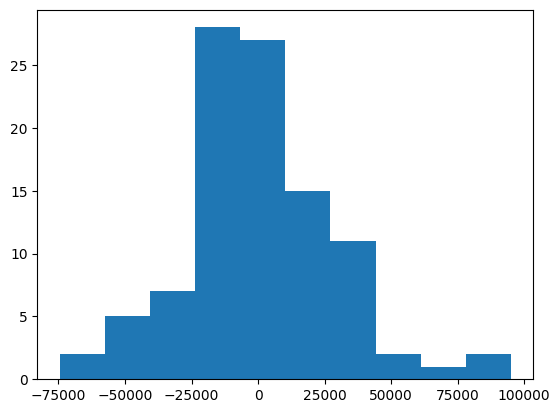

In [54]:
# Create a histogram to visualize the differences between actual target values (Y) and predicted values (predictions)
plt.hist(Y - predictions1)

This plot showcases the variance between actual target values (Y) and predicted values (predictions). Notably, the distribution closely resembles a normal distribution centered around 0, signifying a favorable outcome.

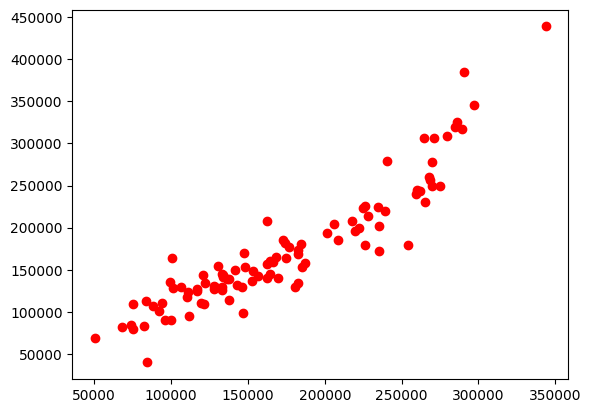

In [55]:
# Create a scatter plot to visualize the relationship between predicted values (predictions) and actual target values (Y)
plt.scatter(predictions1, Y, color = 'r')

For this scatter plot, each point represents a pair of a predicted value (X-axis) and its corresponding actual target value (Y-axis). We can see the points generally align along a diagonal line, indicating a strong correlation between predicted and actual values.

[Back to top](#Index)

### 3.2 Analysis <a class=“anchor” id=“3.2-Analysis”></a>

As previously stated, we've already run predictions using Set 1 with 6 independent variables. In this analysis, we'll experiment with two alternative sets of independent variables to compare prediction performance. This comparison will help us determine which set of variables yields better prediction results.

__Set 2: We use all 12 independent variables with the correlation coefficients exceeding 0.5.__

In [70]:
# Select the top 13 variables with the highest correlation to SalePrice and store their column names
cols2 = corr['SalePrice'].sort_values(ascending=False)[0:13].index

# Create a DataFrame X containing the selected columns from the original dataset
X = data[cols2]

# Extract the SalePrice column as the target variable Y
Y = X['SalePrice']

# Drop the SalePrice column from the feature variables to create input data for the model
X = X.drop(['SalePrice'], axis=1)

# Instantiate the Linear Regression model and train it on the selected features (X) and target variable (Y)
model2 = lr.fit(X, Y)

# Predict the target variable using the trained model
predictions2 = model2.predict(X)

__Set 3: We use all 15 independent variables with the correlation coefficients exceeding 0.4.__

In [72]:
# Select the top 16 variables with the highest correlation to SalePrice and store their column names
cols3 = corr['SalePrice'].sort_values(ascending=False)[0:16].index

# Create a DataFrame X containing the selected columns from the original dataset
X = data[cols3]

# Extract the SalePrice column as the target variable Y
Y = X['SalePrice']

# Drop the SalePrice column from the feature variables to create input data for the model
X = X.drop(['SalePrice'], axis=1)

# Instantiate the Linear Regression model and train it on the selected features (X) and target variable (Y)
model3 = lr.fit(X, Y)

# Predict the target variable using the trained model
predictions3 = model3.predict(X)

[Back to top](#Index)

### 3.3 Results <a class=“anchor” id=“3.3-Results”></a>

**Model 2**

R^2 is: 0.8559416534609251


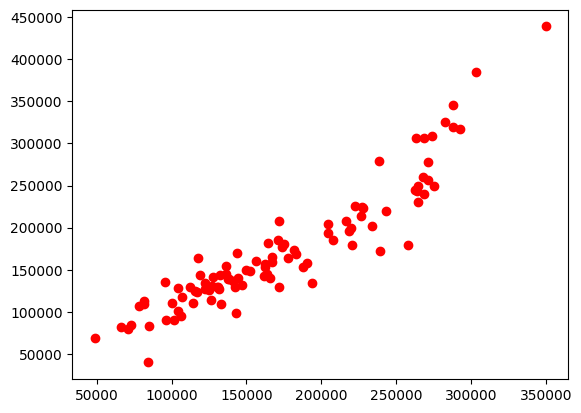

In [60]:
# Print the R-squared value to assess the model's performance
print(f"R^2 is: {model2.score(X, Y)}")

# Create a scatter plot to visualize the relationship between predicted and actual values
plt.scatter(predictions2, Y, color='r')

Using Set 2 (12 independent variables), we attained an R-squared value of 0.85. This suggests that around 85% of the variability in the target variable can be accounted for by the independent variables integrated into the model. Notably, this represents a slight enhancement compared to the results obtained from Set 1.

**Model 3**

R^2 is: 0.8824028808099046


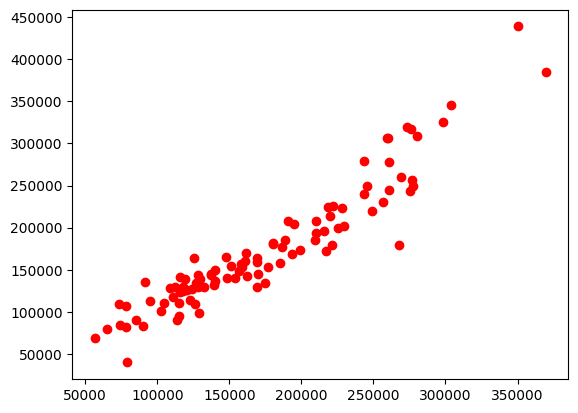

In [26]:
# Print the R-squared value to assess the model's performance
print(f"R^2 is: {model3.score(X, Y)}")

# Create a scatter plot to visualize the relationship between predicted and actual values
plt.scatter(predictions3, Y, color='r')

With Set 3 (15 independent variables), we achieved an R-squared value of 0.88, indicating that approximately 88% of the variability in the target variable can be explained by the incorporated independent variables. This improvement is noteworthy when compared to the outcomes of Set 1 and Set 2.

In comparison, model3 outperformed the others with an R-squared value of 0.88, surpassing Model 1 (0.84) and Model 2 (0.85). Model 3 incorporates the highest number of independent variables among the three. This extended set of variables enables the model to capture a wider range of data variations and patterns, enhancing its ability to reflect underlying feature-target relationships. Consequently, the model effectively explains more variance in the target variable, leading to an elevated R-squared value.

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data <a class=“anchor” id=“3.4-Verify-Your-Model-Against-Test-Data”></a>

Now, it's time to test our models against test data to confirm its accuracy on new data.

**Import and Explore Test Data**

In [65]:
# Read the CSV file 'jtest.csv' and store the data in the 'test' DataFrame
test = pd.read_csv('jtest.csv')

# Display the shape of the 'test' DataFrame, indicating the number of rows and columns
test.shape


(100, 82)

**Prepare Test Data**

In [62]:
# Create a DataFrame 'nulls' to store the count of missing values for each column in the 'test' DataFrame
# Sort the columns in descending order of missing values and display the top 20
nulls = pd.DataFrame(test.isnull().sum().sort_values(ascending=False))[0:20]

# Display the 'nulls' DataFrame to inspect the columns with the highest count of missing values
nulls

# Create a DataFrame 'test_data' containing only numeric columns from the 'test' DataFrame
# Interpolate missing values and drop columns with remaining missing values
test_data = test.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)

# Calculate the sum of columns with non-zero missing values in the 'test_data' DataFrame
sum(test_data.isnull().sum()!=0)

# Display the shape of the 'test_data' DataFrame to show the number of rows and columns after cleaning
test_data.head()


,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,100,101,20,10603,6,7,1977,2001,28.0,1200,...,168,68,0,0,0,0,0,2,2010,205000
1,101,102,60,9206,6,5,1985,1985,336.0,0,...,192,46,0,0,0,0,0,6,2010,178000
2,102,103,90,7018,5,5,1979,1979,0.0,0,...,0,0,0,0,0,0,0,6,2009,118964
3,103,104,20,10402,7,5,2009,2009,0.0,0,...,0,36,0,0,0,0,0,5,2010,198900
4,104,105,50,7758,7,4,1931,1950,600.0,224,...,0,0,0,0,184,0,0,6,2007,169500


**Test each Training Model with Test Data**

**Model 1**

In [69]:
# Create a new DataFrame 'X' containing the columns specified in 'cols' from the cleaned 'test_data'
X = test_data[cols1]

# Extract the 'SalePrice' column as the target variable 'Y' for testing data
Y = X['SalePrice']

# Drop the 'SalePrice' column from the 'X' DataFrame to form the feature variables for testing data
X = X.drop(['SalePrice'], axis=1)

# Use the trained linear regression model to make predictions on the feature variables 'X'
predictions = model1.predict(X)

# Display the R-squared value of the model's performance on the testing data
print(f"R^2 is: {model1.score(X, Y)}")

R^2 is: 0.7483862926719741


**Model 2**

In [71]:
# Create a new DataFrame 'X' containing the columns specified in 'cols' from the cleaned 'test_data'
X = test_data[cols2]

# Extract the 'SalePrice' column as the target variable 'Y' for testing data
Y = X['SalePrice']

# Drop the 'SalePrice' column from the 'X' DataFrame to form the feature variables for testing data
X = X.drop(['SalePrice'], axis=1)

# Use the trained linear regression model to make predictions on the feature variables 'X'
predictions = model2.predict(X)

# Display the R-squared value of the model's performance on the testing data
print(f"R^2 is: {model2.score(X, Y)}")

R^2 is: 0.7667085258179096


**Model 3**

In [73]:
# Create a new DataFrame 'X' containing the columns specified in 'cols' from the cleaned 'test_data'
X = test_data[cols3]

# Extract the 'SalePrice' column as the target variable 'Y' for testing data
Y = X['SalePrice']

# Drop the 'SalePrice' column from the 'X' DataFrame to form the feature variables for testing data
X = X.drop(['SalePrice'], axis=1)

# Use the trained linear regression model to make predictions on the feature variables 'X'
predictions = model3.predict(X)

# Display the R-squared value of the model's performance on the testing data
print(f"R^2 is: {model3.score(X, Y)}")

R^2 is: 0.7493722119022505


After testing our models on the test data, we compile the outcomes obtained from both the training and test data into the following table:

| model | # independent variables | R^2 training | R^2 test |
|----------|----------|----------|----------|
| model1 | 6 | 0.84 | 0.74 |
| model2 | 12 | 0.85 | 0.76 |
| model3 | 15 | 0.88 | 0.74 |


We can see that the observed results on the test data are somewhat lower compared to our previous findings. Interestingly, model2, despite having a slightly lower R-squared value compared to model3 during training, displayed better performance on the test data compared to both model1 and model3. This outcome highlights the importance of assessing a model's effectiveness on unseen data rather than relying solely on its R-squared value derived from the training data.

[Back to top](#Index)

## Conclusion <a class=“anchor” id=“Conclusion”></a>

After our thorough analysis, we draw the following conclusions:

**Model Performance**: Among the models tested, Model 2 emerged as the most effective in terms of results. Despite having a slightly lower R-squared value during training compared to Model 3, Model 2 exhibited superior performance on the test data. This highlights the significance of evaluating a model's predictive power on unseen data, emphasizing the importance of generalization.

**Number of Independent Variables**: Introducing more independent variables, as demonstrated by Model 2, positively impacted its prediction accuracy. While including more variables can lead to better performance, it's essential to strike a balance to avoid overfitting.

**Overfitting**: While Model 3 showcased a higher R-squared value during training, it didn't necessarily perform better on the test data. This raises the cautionary note of overfitting – a model may excel on training data but falter on new data. Model 2's success on test data indicates a better balance between model complexity and generalization.

**Computational Power and Cost**: Incorporating additional variables in Model 2 enhances accuracy but may also increase computational requirements and costs. Careful consideration of available resources is crucial when deciding on the complexity of a model.

**Data Analysis Techniques**: Creating the prediction model has underscored the importance of various data analysis techniques. We've learned the significance of exploring correlations, handling missing data, evaluating distribution shapes, and making informed decisions about feature selection. It's clear that a successful prediction model requires a deep understanding of the data and careful consideration of various factors.

In summary, the approach of Model 2, which included a balanced selection of independent variables, exhibited the best overall results. This experience reinforces the notion that the efficacy of a model extends beyond training performance and emphasizes the critical nature of testing on unseen data.


[Back to top](#Index
)
## References <a class=“anchor” id=“References”></a>

- Theobald, Oliver. "Machine Learning For Absolute Beginners: A Plain English Introduction (Second Edition)". June 21, 2017: 60-63

- Barai, Abhishek. "Normal Distribution and Machine Learning." Medium. Nov 19, 2020. https://medium.com/analytics-vidhya/normal-distribution-and-machine-learning-ec9d3ca05070

- Stojiljkovic, Mirko. "Linear Regression in Python." Real Python. https://realpython.com/linear-regression-in-python/

- Rajbangshi, Anju. "Overfitting and Underfitting in Machine Learning". Medium. Apr 22, 2020. https://medium.com/analytics-vidhya/overfitting-and-underfitting-in-machine-learning-d829d8501335


<div class="alert alert-block alert-info">